In [ ]:
df.head(3)

,data,tipo,tipo_2,inicio,final,paginas
0,2025-05-31,Técnico,STEM,228.0,231.0,4
1,2025-05-31,Técnico,STEM,1.0,40.0,40
2,2025-05-30,Literatura,HASS,49.0,61.0,13


In [ ]:
stem_hass = pd.crosstab(index=df.data, columns=df.tipo_2, values=df.paginas, aggfunc='sum')
stem_hass = stem_hass.reset_index()
stem_hass['data'] = stem_hass['data'].dt.strftime('%d')
stem_hass

tipo_2,data,HASS,STEM
0,01,4.0,7.0
1,02,NaN,10.0
2,03,17.0,NaN
3,04,21.0,NaN
4,07,10.0,38.0
5,08,8.0,2.0
6,12,52.0,NaN
7,13,24.0,NaN
8,14,21.0,15.0
9,15,13.0,23.0


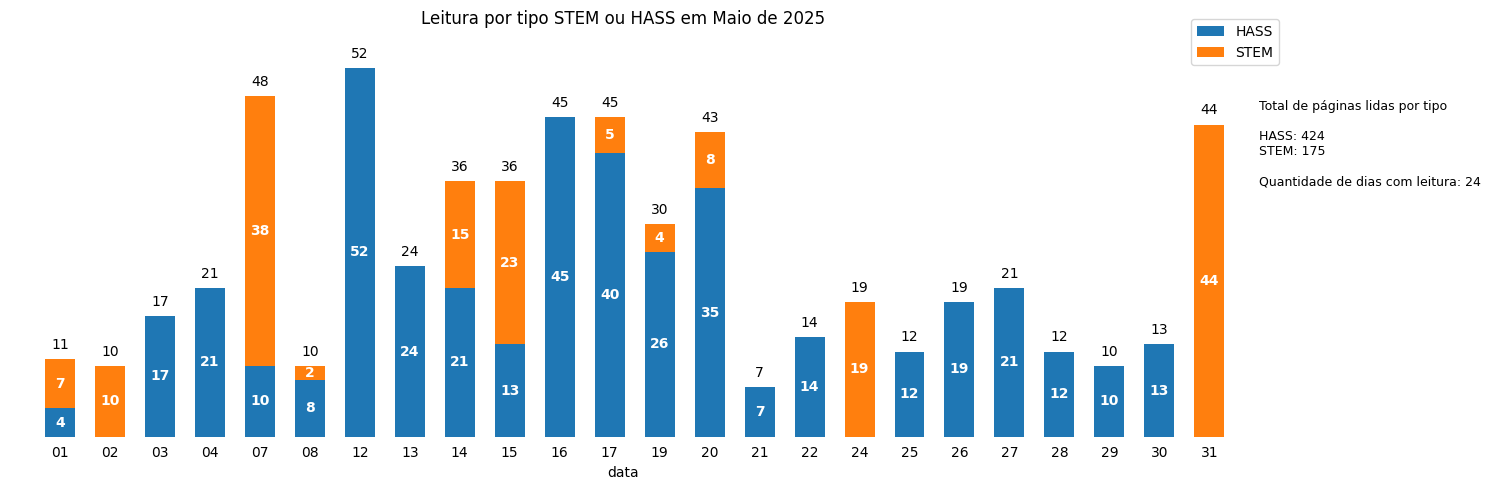

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,5))  # Aumenta o espaço horizontal
stem_hass.plot(x='data', kind='bar', stacked=True, width=0.6, ax=ax)
plt.xticks(rotation=0)

# Adiciona rótulos dentro das barras
for container in ax.containers:
    labels = [f'{bar.get_height():.0f}' if bar.get_height() != 0 else '' for bar in container]
    ax.bar_label(container, labels=labels, label_type="center", color="white", fontweight="bold")

totais = stem_hass.drop(columns="data").sum(axis=1)
x_pos = range(len(stem_hass))

# Coloca os totais em cima de cada barra
for x, total in zip(x_pos, totais):
    ax.text(x, total + 1, f'{total:.0f}', ha="center", va='bottom', color='black')

ax.set_ylim(0, totais.max() + 5)
ax.set_xlim(-1,)
ax.tick_params(axis='x', length=0, pad=7)
ax.legend(bbox_to_anchor=(1.04, 1.05))
ax.set_frame_on(False)
ax.set_yticklabels([])
ax.set_yticks([])

plt.title("Leitura por tipo STEM ou HASS em Maio de 2025")
ax.text(24, 35,
        f'Total de páginas lidas por tipo\n\nHASS: {int(stem_hass["HASS"].sum())}\nSTEM: {int(stem_hass["STEM"].sum())}\n\nQuantidade de dias com leitura: {len(stem_hass)}',
        ha="left",
        va='bottom',
        fontsize=9,
        color='black')
plt.tight_layout()
plt.show()


In [ ]:
tec_lit = pd.crosstab(index=df.data, columns=df.tipo, values=df.paginas, aggfunc="sum")
tec_lit = tec_lit.reset_index()
tec_lit['data'] = tec_lit['data'].dt.strftime('%d')

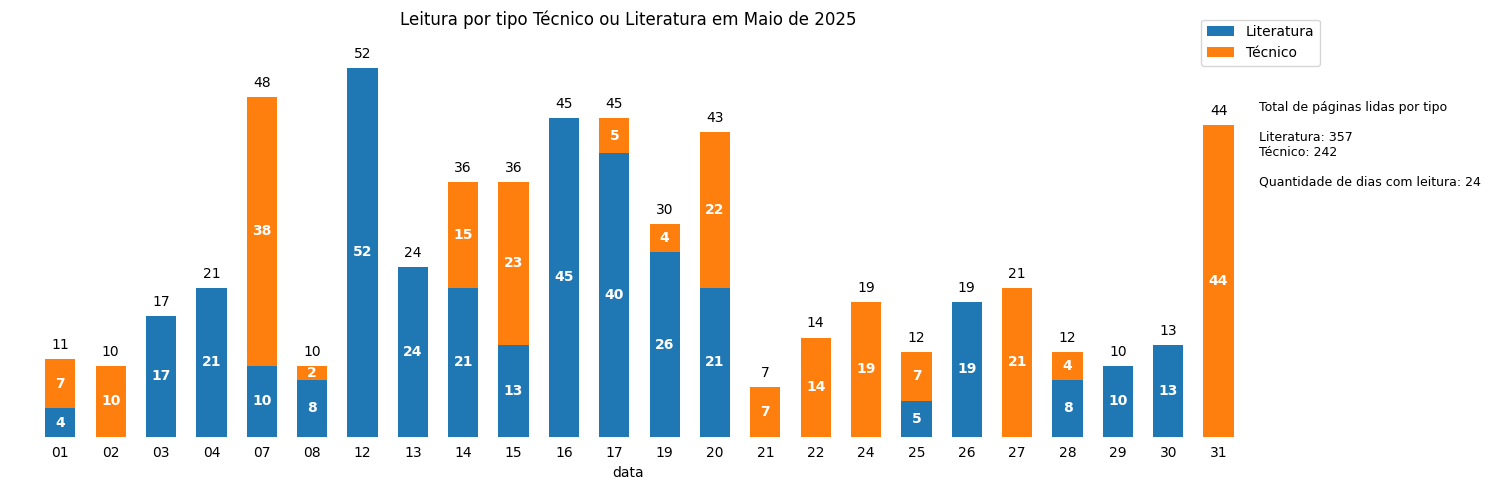

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))

tec_lit.plot(x='data', kind="bar", stacked=True, width=0.6, ax=ax)
plt.xticks(rotation=0)

for container in ax.containers:
  labels = [f'{bar.get_height():.0f}' if bar.get_height() != 0 else '' for bar in container]
  ax.bar_label(container, labels=labels, label_type='center', color="white", fontweight='bold')

totais = tec_lit.drop(columns='data').sum(axis=1)
x_pos = range(len(tec_lit))

for x, total in zip(x_pos, totais):
  ax.text(x, total + 1, f'{total:.0f}', ha="center", va="bottom")

ax.set_xlim(-1)
ax.tick_params(axis='x', length=0, pad=7)
ax.set_yticks([])
ax.set_yticklabels([])
ax.set_frame_on(False)
ax.set_ylim(0, totais.max()+5)
ax.legend(bbox_to_anchor=(1.065, 1.05))

plt.title("Leitura por tipo Técnico ou Literatura em Maio de 2025")
ax.text(23.8, 35,
        f'Total de páginas lidas por tipo\n\nLiteratura: {int(tec_lit["Literatura"].sum())}\nTécnico: {int(tec_lit["Técnico"].sum())}\n\nQuantidade de dias com leitura: {len(tec_lit)}',
        ha="left",
        va='bottom',
        fontsize=9,
        color='black')
plt.tight_layout()
plt.show()